In [85]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

In [94]:
def se_cov(X1, X2, length=1, var_func=1, var_signal=.1):
    diff = X1[:, None] - X2[None, :]
    is_equal = (diff == 0)
    
    return var_func**2 * np.exp(-1/(2 * length**2) * np.abs(diff)) + var_signal**2 * is_equal

In [95]:
X = np.array([0,.2,1,2,4])
# X = np.linspace(0, 10, 100)
K = se_cov(X, X)
K

array([[1.01      , 0.90483742, 0.60653066, 0.36787944, 0.13533528],
       [0.90483742, 1.01      , 0.67032005, 0.40656966, 0.14956862],
       [0.60653066, 0.67032005, 1.01      , 0.60653066, 0.22313016],
       [0.36787944, 0.40656966, 0.60653066, 1.01      , 0.36787944],
       [0.13533528, 0.14956862, 0.22313016, 0.36787944, 1.01      ]])

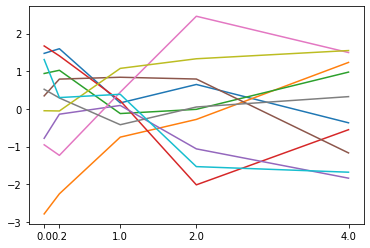

In [122]:
np.random.seed(123)

for i in range(10):
    f = np.random.multivariate_normal(np.zeros_like(X), K)
    plt.plot(X, f)

plt.xticks(X);

In [169]:
def GP(X2, X1=np.array([]), f1=np.array([]), cov_func=se_cov, **cov_func_kwargs):
    A = cov_func(X1, X1, **cov_func_kwargs)
    B = cov_func(X2, X2, **cov_func_kwargs)
    C = cov_func(X1, X2, **cov_func_kwargs)

    print(A.shape, B.shape, C.shape, f_train.shape)
    
    mean = C.T @ LA.inv(A) @ f1
    cov = B - C.T @ LA.inv(A) @ C
    
    return mean, cov

In [170]:
X_test = np.linspace(0,15,400)
X_train = np.array([1, 2.2, 5])
f_train = np.array([.5, 1.5, -2])

(3, 3) (400, 400) (3, 400) (3,)


''

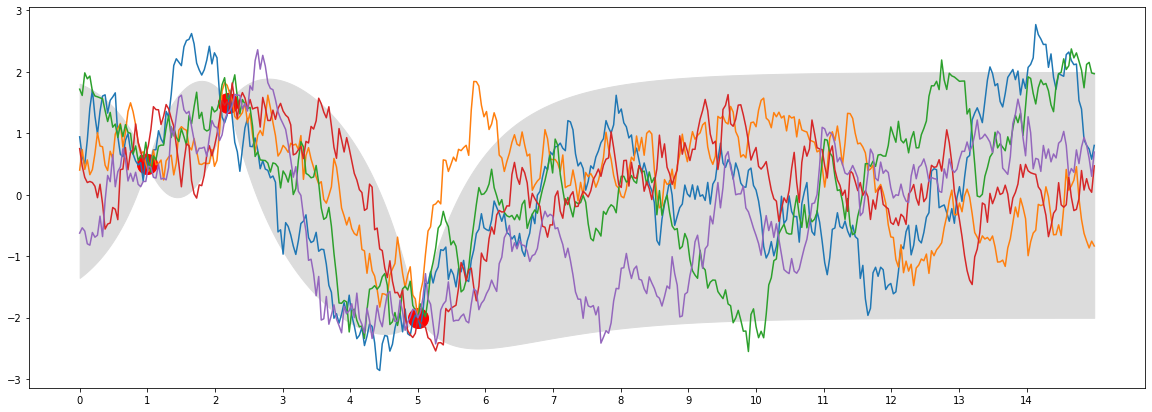

In [171]:
# GP
length=.8
var_func=1
var_signal=.0001

mean, cov = GP(X_test, X_train, f_train, length=length, var_func=var_func, var_signal=var_signal)

# preparations
np.random.seed(2)
plt.figure(figsize=(20,7))
plt.xticks(np.arange(X_test.max()))

# sample trajectories
for i in range(5):
    f_test = np.random.multivariate_normal(mean, cov)
    plt.plot(X_test, f_test)

# plot 95% conf interval, per point
variances = np.diag(cov)
plt.fill_between(X_test, mean + 2*variances, mean - 2*variances, color="gainsboro")

# plot training data
plt.scatter(X_train, f_train, color="red", s=400)
;

(3, 3) (400, 400) (3, 400) (3,)


''

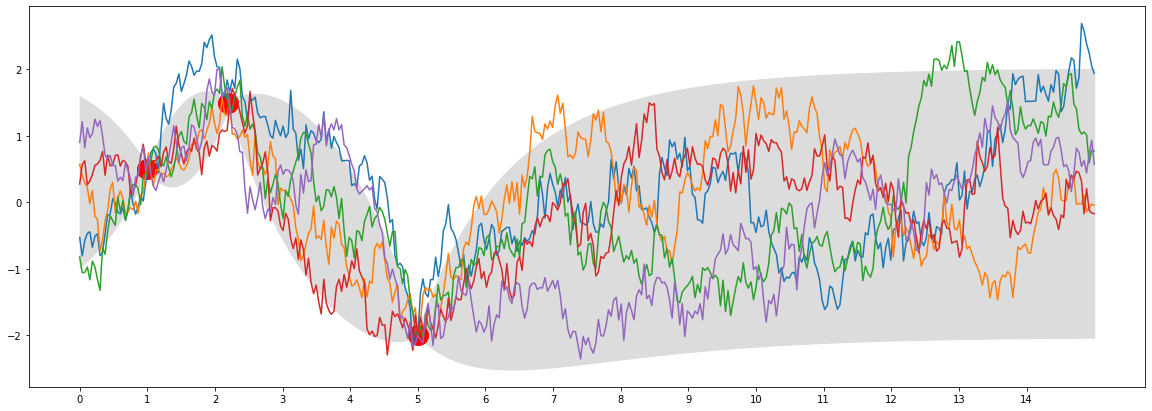

In [172]:
# GP with default parameters for SE covariance
mean, cov = GP(X_test, X_train, f_train)

# preparations
np.random.seed(2)
plt.figure(figsize=(20,7))
plt.xticks(np.arange(X_test.max()))

# sample trajectories
for i in range(5):
    f_test = np.random.multivariate_normal(mean, cov)
    plt.plot(X_test, f_test)

# plot 95% conf interval, per point
variances = np.diag(cov)
plt.fill_between(X_test, mean + 2*variances, mean - 2*variances, color="gainsboro")

# plot training data
plt.scatter(X_train, f_train, color="red", s=400)
;

# Wiener Process / Brownian Bridge

(1, 1) (18, 18) (1, 18) (1,)
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.  0.1 0.1 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.  0.1 0.1 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.  0.1 0.1 0.2 0.2 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]
 [0.  0.1 0.1 0.2 0.2 0.3 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
 [0.  0.1 0.1 0.2 0.2 0.3 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
 [0.  0.1 0.1 0.2 0.2 0.3 0.4 0.4 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.  0.1 0.1 0.2 0.2 0.3 0.4 0.4 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.  0.1 0.1 0.2 0.2 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
 [0.  0.1 0.1 0.2 0.2 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
 [0.  0.1 0.1 0.2 0.2 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.7 0.7 0.7 0.7 0.7 0

''

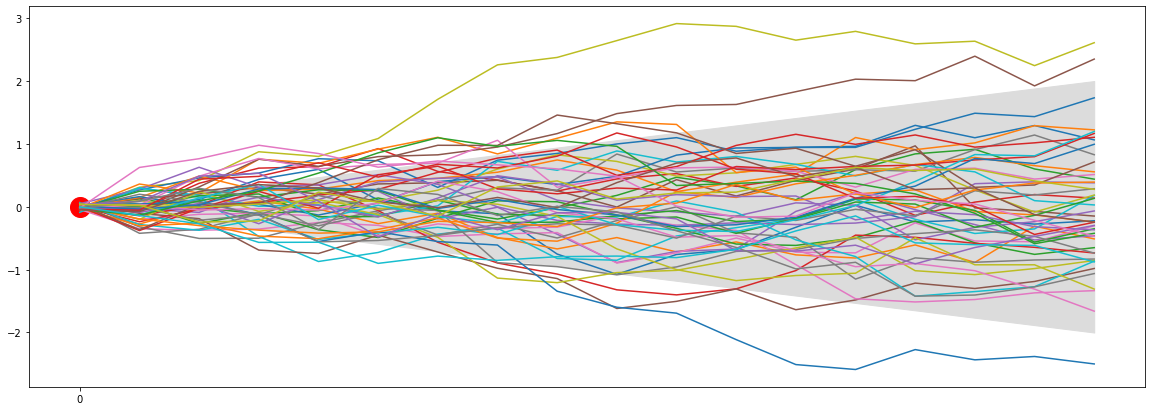

In [201]:
def wiener_cov(X1, X2, diag_add=0.):
    mini = np.minimum(X1[:, None], X2[None, :]).astype(float)
    if (mini.shape[0] == mini.shape[1]):
        mini += np.eye(mini.shape[0]) * diag_add
    return mini

X_train = np.array([0, 1])
f_train = np.array([0, 0])

X_train = np.array([0])
f_train = np.array([0])


X_test = np.linspace(.0001, 1, 18)

mean, cov = GP(X_test, X_train, f_train, wiener_cov, diag_add=.001)

#print(X_test.round(2))
#print(mean)
print(cov.round(1))

# preparations
np.random.seed(2)
plt.figure(figsize=(20,7))
plt.xticks(np.arange(X_test.max()))

# sample trajectories
for i in range(50):
    f_test = np.random.multivariate_normal(mean, cov)
    plt.plot(X_test, f_test)

# plot 95% conf interval, per point
variances = np.diag(cov)
plt.fill_between(X_test, mean + 2*variances, mean - 2*variances, color="gainsboro")

# plot training data
plt.scatter(X_train, f_train, color="red", s=400)
;